In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from matplotlib import pyplot as plt
import random
import time
from keras.datasets import cifar10
from sklearn.decomposition import PCA
from skimage.feature import hog
from skimage import data, exposure
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid

In [ ]:
# Downloading the dataset (CIFAR-10) using keras.datasets library
def load_dataset():
 # load dataset
 (X_train,y_train),(X_test,y_test) = cifar10.load_data()
 return X_train,y_train,X_test,y_test

In [ ]:
# Initial Exploration of the dataset and its dimensions
X_train,y_train,X_test,y_test =  load_dataset()
print("The shape of X_train is :",X_train.shape)
print("The shape of y_train is :",y_train.shape)

print("The shape of X_test is :",X_test.shape)
print("The shape of y_test is :",y_test.shape)

print("The number of unique classes is:",len(np.unique(y_train)))

labels =["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
print("Class Names are:",labels)

170498071/170498071 [==============================] - 3s 0us/step
The shape of X_train is : (50000, 32, 32, 3)
The shape of y_train is : (50000, 1)
The shape of X_test is : (10000, 32, 32, 3)
The shape of y_test is : (10000, 1)
The number of unique classes is: 10
Class Names are: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
# Check the percentage of each class in the training and the test set
def check_class_percentages(y, dataset_name):
    unique_classes, class_counts = np.unique(y, return_counts=True)
    total_samples = len(y)
    class_percentages = class_counts / total_samples * 100

    print(f"Percentage of each class in the {dataset_name} data:")
    for class_name, percentage in zip(unique_classes, class_percentages):
        print(f"Class {class_name}: {percentage:.2f}%")

# Print class percentages for the training data
check_class_percentages(y_train, "training")

# Print class percentages for the testing data
check_class_percentages(y_test, "testing")

Percentage of each class in the training data:
Class 0: 10.00%
Class 1: 10.00%
Class 2: 10.00%
Class 3: 10.00%
Class 4: 10.00%
Class 5: 10.00%
Class 6: 10.00%
Class 7: 10.00%
Class 8: 10.00%
Class 9: 10.00%
Percentage of each class in the testing data:
Class 0: 10.00%
Class 1: 10.00%
Class 2: 10.00%
Class 3: 10.00%
Class 4: 10.00%
Class 5: 10.00%
Class 6: 10.00%
Class 7: 10.00%
Class 8: 10.00%
Class 9: 10.00%


In [ ]:
# Preprocess target labels for our neural networks by performing one hot encoding
# The classification matrix and the classifiers from the sklearn.neighbors library
# need the classes to be in a 1-d vector and thus the one-hot encoding is skipped for now.

# importing keras to implement the to_categorical function that will perform the
# one-hot encoding
import keras
'''
def preprocess_labels(y_train,y_test,number_of_classes):
  # one hot encode target values
  y_train = keras.utils.to_categorical(y_train,num_classes=number_of_classes)
  y_test = keras.utils.to_categorical(y_test,num_classes=number_of_classes)
  return y_train,y_test

y_train_onehot,y_test_onehot = preprocess_labels(y_train,y_test,len(labels))
print("Shape of one-hot-encoded y_train: ",y_train_onehot.shape)
print("Shape of one-hot-encoded y_test: ",y_test_onehot.shape)
'''

'\ndef preprocess_labels(y_train,y_test,number_of_classes):\n  # one hot encode target values\n  y_train = keras.utils.to_categorical(y_train,num_classes=number_of_classes)\n  y_test = keras.utils.to_categorical(y_test,num_classes=number_of_classes)\n  return y_train,y_test\n\ny_train_onehot,y_test_onehot = preprocess_labels(y_train,y_test,len(labels))\nprint("Shape of one-hot-encoded y_train: ",y_train_onehot.shape)\nprint("Shape of one-hot-encoded y_test: ",y_test_onehot.shape)\n'

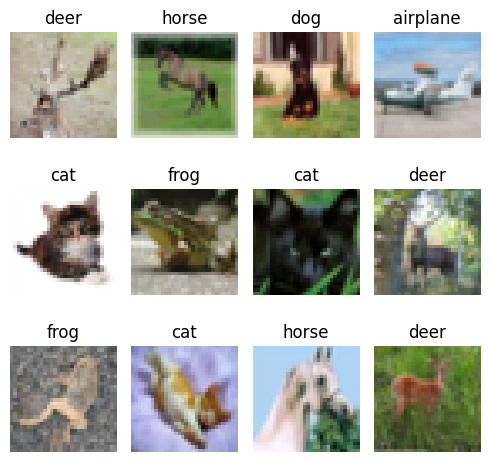

In [ ]:
# Display the images to get a better visual understanding of the dataset

# Number of images to display
num_images_to_display = 12

# Create a random list of indices - to display random images of the dataset each time
random_indices = random.sample(range(len(X_train)), num_images_to_display)

# Create a grid layout for displaying images
rows = 3  # Number of rows of grid
cols = 4  # Number of columns of grid

# Create a figure for the grid
fig, axes = plt.subplots(rows, cols, figsize=(5, 5))

# Loop through the grid and display the images
for i in range(rows):
    for j in range(cols):
        index = random_indices[i * cols + j]
        ax = axes[i, j]
        ax.imshow(X_train[index], cmap=plt.cm.binary)
        ax.axis('off')

        # Get the label for the current image
        label_index = y_train[index, 0]

        ax.set_title(labels[label_index])

plt.tight_layout()
plt.show()

In [ ]:
# Checking how a single image is represented in the dataset
print("X_train example:",X_train[0:1,:])
print("y_train example:",y_train[0:1,:])

X_train example: [[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]]
y_train example: [[6]]


In [ ]:
# We know that the pixels in each image is between no colour and full color and thus [0,255]

def normalization_pixels(train, test):
 # convert from integers to floats
 train_norm = train.astype('float32')
 test_norm = test.astype('float32')
 # normalize to range 0-1
 train_norm = train_norm / 255.0
 test_norm = test_norm / 255.0
 # return normalized images
 return train_norm, test_norm

X_train_norm, X_test_norm = normalization_pixels(X_train,X_test)

In [ ]:
# Check the results of Normalization
print("Maximum of Normalized Data(X_train):",np.max(X_train_norm))
print("Minimum of Normalized Data(X_train):",np.min(X_train_norm))
print("Maximum of Normalized Data(X_test):",np.max(X_test_norm))
print("Minimum of Normalized Data(X_test):",np.min(X_test_norm))

Maximum of Normalized Data(X_train): 1.0
Minimum of Normalized Data(X_train): 0.0
Maximum of Normalized Data(X_test): 1.0
Minimum of Normalized Data(X_test): 0.0


In [ ]:
# Reshape the X_train and X_test data to 2D arrays
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Reshape the Normalized X_train and X_test to  2D arrays
X_train_norm_2d = X_train_norm.reshape(X_train_norm.shape[0],-1)
X_test_norm_2d = X_test_norm.reshape(X_test_norm.shape[0],-1)

print("New Dimensions of X_train are:",X_train_2d.shape)
print("New Dimensions of X_test are:",X_test_2d.shape)

New Dimensions of X_train are: (50000, 3072)
New Dimensions of X_test are: (10000, 3072)


In [ ]:
# Implement Feature Selection Using PCA in the 2D Feature Array
def feature_selection_pca(X_train,X_test):
  # Select the number of features of the dataset, in our dataset it is pixels, that explain 95% of the variance
  pca = PCA(n_components=0.95,svd_solver='auto',tol=0.0,random_state=None)
  # Fitting and Transforming the training and the testing to reduce the dimensionality of both datasets
  X_train_pca = pca.fit_transform(X_train)
  X_test_pca = pca.transform(X_test)
  return X_train_pca,X_test_pca

X_train_2d_pca,X_test_2d_pca = feature_selection_pca(X_train_2d,X_test_2d)

In [ ]:
print("New Dimensions of X_train are:",X_train_2d_pca.shape)
print("New Dimensions of X_test are:",X_test_2d_pca.shape)

New Dimensions of X_train are: (50000, 217)
New Dimensions of X_test are: (10000, 217)


In [ ]:
# Implement Feature Selection using the Pixel Values in the Original Pictures
# for each pixel the mean value of the 3 channels will be calculated

# Initialize feature matrices for train and test sets
# We use the Normalized train and test set as otherwise the addition we will
# perform later on will lead to very large numbers
def average_pixel_rgbvalue(X_train,X_test):
  X_train_feature_matrix = np.zeros(X_train.shape[:3], dtype=np.float32)
  X_test_feature_matrix = np.zeros(X_test.shape[:3], dtype=np.float32)

  # Loop through the training set and calculate the mean for the 3 channels
  for i in range(X_train_feature_matrix.shape[0]):
      for j in range(X_train_feature_matrix.shape[1]):
          for k in range(X_train_feature_matrix.shape[2]):
              X_train_feature_matrix[i][j][k] = (X_train[i][j][k][0] + X_train[i][j][k][1] + X_train[i][j][k][2]) / 3

  # Loop through the test set and calculate the mean for the 3 channels
  for i in range(X_test_feature_matrix.shape[0]):
      for j in range(X_test_feature_matrix.shape[1]):
          for k in range(X_test_feature_matrix.shape[2]):
              X_test_feature_matrix[i][j][k] = (X_test[i][j][k][0] + X_test[i][j][k][1] + X_test[i][j][k][2]) / 3

  return X_train_feature_matrix,X_test_feature_matrix

# Call the created function
X_train_rgb_features,X_test_rgb_features = average_pixel_rgbvalue(X_train_norm,X_test_norm)
# Reshape the feature arrays to 2D arrays
X_train_rgb_features = X_train_rgb_features.reshape(X_train_rgb_features.shape[0], -1)
X_test_rgb_features = X_test_rgb_features.reshape(X_test_rgb_features.shape[0], -1)

In [ ]:
# Calculate the brightness in specific points of each image in the training and testing datasets
def extract_brightness_features(X_train, X_test):
    train_average_brightness = np.mean(X_train, axis=(1, 2, 3)).reshape(-1,1)
    test_average_brightness = np.mean(X_test, axis=(1, 2, 3)).reshape(-1,1)

    # Calculate brightness at appropriate positions for each image
    def get_position_brightness(images):
        center = images[:, 16, 16]
        top_left = images[:, 0, 0]
        top_right = images[:, 0, 31]
        bottom_left = images[:, 31, 0]
        bottom_right = images[:, 31, 31]
        return center, top_left, top_right, bottom_left, bottom_right

    train_center, train_top_left, train_top_right, train_bottom_left, train_bottom_right = get_position_brightness(X_train)
    test_center, test_top_left, test_top_right, test_bottom_left, test_bottom_right = get_position_brightness(X_test)

    return np.hstack([train_average_brightness,train_center, train_top_left, train_top_right, train_bottom_left, train_bottom_right]), np.hstack([test_average_brightness ,test_center, test_top_left, test_top_right, test_bottom_left, test_bottom_right])

# Call the function created
X_train_brightness_features,X_test_brightness_features = extract_brightness_features(X_train, X_test)

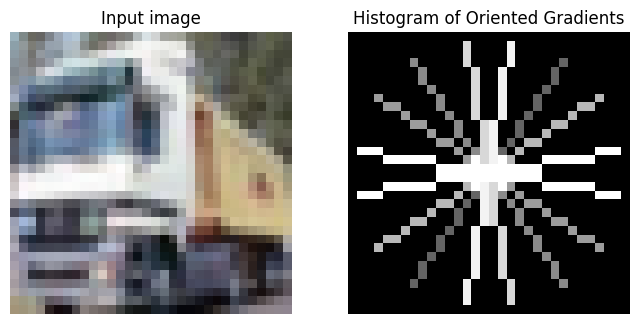

In [ ]:
# Checking how the histograms of oriented gradients work in our dataset
image = X_train[1]

# Perform the Hog implemented function from skimage
# the parameters can take several values
fd, hog_image = hog(
    image,
    orientations=8,
    pixels_per_cell=(32, 32),
    cells_per_block=(1, 1),
    visualize=True,
    channel_axis=-1,
)

# Create 2 subplots to display the original image the Hog output
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [ ]:
# Create a function that calculates the histograms of oriented gradients
def extract_hog_features(X, channel_axis=-1):
    hog_features = []
    # Loop in every image and perform the Hog
    for i in range(X.shape[0]):
        image = X[i]
        hog_image = hog(image,orientations=8,pixels_per_cell=(32, 32),cells_per_block=(1, 1),channel_axis=-1)
        hog_features.append(hog_image)

    return np.array(hog_features)

# Applying the function
X_train_hogfeatures = extract_hog_features(X_train)
X_test_hogfeatures = extract_hog_features(X_test)

In [ ]:
# Create new feature vector with the extracted features
X_train_features = np.hstack([X_train_brightness_features,X_train_rgb_features,X_train_hogfeatures])
X_test_features = np.hstack([X_test_brightness_features,X_test_rgb_features,X_test_hogfeatures])

In [ ]:
X_train_features_pca,X_test_features_pca = feature_selection_pca(X_train_features,X_test_features)

In [ ]:
# Function to calculate and print different classification metrics for comparison of our models
def evaluate_classification_metrics(y_true, y_pred,verbose=True):
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Calculate precision, recall, and F1-score for all unique labels
    precision = precision_score(y_true, y_pred,zero_division=0, average='weighted')
    recall = recall_score(y_true, y_pred,zero_division=0, average='weighted')
    f1 = f1_score(y_true, y_pred,zero_division=0,average='weighted')

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Generate a classification report
    class_report = classification_report(y_true, y_pred, zero_division=0)
    if verbose:
      print(f'\tAccuracy: {accuracy}')
      print(f'\tPrecision Weighted: {precision}')
      print(f'\tRecall Weighted: {recall}')
      print(f'\tF1-Score Weighted: {f1}')

    return {
        "Accuracy": accuracy,
        "Weighted Precision": precision,
        "Weighted Recall": recall,
        "Weighted F1 Score": f1,
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report
    }

In [ ]:
# Function to fit a Nearest Neighbor Classifier and perform predictions based on it
# Y train is expected to have Label Enconding
def fit_predict_Knn_Classifier(number_of_neighbors,X_train,y_train,X_test):
  if y_train.ndim == 2: # in order to put the labels in a 1d array
    y_train =  y_train.flatten()
  start_time = time.time()
  # The algorithm is set to auto in order for the algorithm to determine the best approach best of data
  Knn_Classifier = KNeighborsClassifier(n_neighbors=number_of_neighbors, algorithm='auto',p=2,n_jobs=-1).fit(X_train,y_train)
  end_time = time.time()
  training_time = end_time - start_time
  # Make predictions on a test dataset
  start_time = time.time()
  y_pred = Knn_Classifier.predict(X_test)
  end_time = time.time()
  predicting_time = end_time - start_time
  return y_pred ,training_time,predicting_time

In [ ]:
# Function to fit a Nearest Centroid Classifier and make predictions with it
# Y train is expected to have Label Enconding
def fit_predict_Nearest_Centroid_Classifier(X_train,y_train,X_test):
  if y_train.ndim == 2: # in order to put the labels in a 1d array
    y_train =  y_train.flatten()
  # Initialize the Classifier
  start_time = time.time()
  Nearest_Centroid_Classifier = NearestCentroid()
  # we flatten the y_train because the classified does not expect a 2d array
  Nearest_Centroid_Classifier.fit(X_train,y_train)
  end_time = time.time()
  training_time = end_time - start_time
  # Make predictions on a test dataset
  start_time = time.time()
  y_pred = Nearest_Centroid_Classifier.predict(X_test)
  end_time = time.time()
  predicting_time = end_time - start_time
  return y_pred,training_time,predicting_time

In [ ]:
# Creating some variables to prevent code duplication for the different preprocessing
# steps and contribute to store the results in an organized way

# List with the methods used as Preprocessing Steps
preprocessing_methods = ["No Preprocessing", "Normalization", "PCA", "Extracted Features","Extracted Features & PCA"]
# Creating an array of tuples in order to test all the different combinations of the preprocessed sets
preprocessed_sets = [
    (X_train_2d, X_test_2d),
    (X_train_norm_2d, X_test_norm_2d),
    (X_train_2d_pca, X_test_2d_pca),
    (X_train_features, X_test_features),
    (X_train_features_pca,X_test_features_pca)
]
# List to store the classification metrics results
list_of_results_dictionaries = []

In [ ]:
# Number of neighbors to be used -> could also use grid-search, but only 2 parameters as used
num_neighbors = [1,3]
classifier_name = "Nearest Neighbors"
# Looping through the tuples of different preprocessed sets
for i, method in enumerate(preprocessing_methods):
    for neighbors in num_neighbors:
        X_train_loop, X_test_loop = preprocessed_sets[i]
        y_pred,training_time,predicting_time = fit_predict_Knn_Classifier(neighbors, X_train_loop, y_train, X_test_loop)
        print(classifier_name + " - " + method)
        # transform the predictions back to label encoding because of the classifications metrics
        metrics = evaluate_classification_metrics(y_test, y_pred)
        list_of_results_dictionaries.append({
            "Classifier Name": classifier_name,
            "Neighbor Numbers": neighbors,
            "Preprocessing Method": method,
            "Weighted Accuracy": metrics["Accuracy"],
            "Weighted Precision": metrics["Weighted Precision"],
            "Weighted Recall": metrics["Weighted Recall"],
            "Weighted F1 Score": metrics["Weighted F1 Score"],
            "Training Time": training_time,
            "Predicting Time": predicting_time
        })

Nearest Neighbors - No Preprocessing
	Accuracy: 0.3539
	Precision Weighted: 0.4112246468463265
	Recall Weighted: 0.3539
	F1-Score Weighted: 0.34947521228731054
Nearest Neighbors - No Preprocessing
	Accuracy: 0.3303
	Precision Weighted: 0.430375458626426
	Recall Weighted: 0.3303
	F1-Score Weighted: 0.3191924379899631
Nearest Neighbors - Normalization
	Accuracy: 0.3539
	Precision Weighted: 0.4112246468463265
	Recall Weighted: 0.3539
	F1-Score Weighted: 0.34947521228731054
Nearest Neighbors - Normalization
	Accuracy: 0.3303
	Precision Weighted: 0.430375458626426
	Recall Weighted: 0.3303
	F1-Score Weighted: 0.3191924379899631
Nearest Neighbors - PCA
	Accuracy: 0.3708
	Precision Weighted: 0.41756612597784104
	Recall Weighted: 0.3708
	F1-Score Weighted: 0.3689490407727112
Nearest Neighbors - PCA
	Accuracy: 0.3518
	Precision Weighted: 0.4395670978158253
	Recall Weighted: 0.3518
	F1-Score Weighted: 0.34548156180731765
Nearest Neighbors - Extracted Features
	Accuracy: 0.271
	Precision Weighted:

In [ ]:
# Nearest Centroid Classifier training
classifier_name = "Nearest Centroid"
# Looping through the different tuples of preprocessed sets
for i, method in enumerate(preprocessing_methods):
      X_train_loop, X_test_loop = preprocessed_sets[i]
      y_pred,training_time,predicting_time = fit_predict_Nearest_Centroid_Classifier(X_train_loop, y_train, X_test_loop)
      print(classifier_name + " - " + method)
      metrics = evaluate_classification_metrics(y_test, y_pred)
      list_of_results_dictionaries.append({
          "Classifier Name": classifier_name,
          "Neighbor Numbers": "Not Applied",
          "Preprocessing Method": method,
          "Weighted Accuracy": metrics["Accuracy"],
          "Weighted Precision": metrics["Weighted Precision"],
          "Weighted Recall": metrics["Weighted Recall"],
          "Weighted F1 Score": metrics["Weighted F1 Score"],
          "Training Time": training_time,
          "Predicting Time": predicting_time
        })

Nearest Centroid - No Preprocessing
	Accuracy: 0.2774
	Precision Weighted: 0.2870265132013498
	Recall Weighted: 0.2774
	F1-Score Weighted: 0.25408598962127454
Nearest Centroid - Normalization
	Accuracy: 0.2774
	Precision Weighted: 0.2870265132013498
	Recall Weighted: 0.2774
	F1-Score Weighted: 0.25408598962127454
Nearest Centroid - PCA
	Accuracy: 0.2774
	Precision Weighted: 0.28710070864503057
	Recall Weighted: 0.2774
	F1-Score Weighted: 0.2540844918197698
Nearest Centroid - Extracted Features
	Accuracy: 0.2131
	Precision Weighted: 0.22492208921690562
	Recall Weighted: 0.2131
	F1-Score Weighted: 0.18808561566270915
Nearest Centroid - Extracted Features & PCA
	Accuracy: 0.202
	Precision Weighted: 0.20674803556826277
	Recall Weighted: 0.202
	F1-Score Weighted: 0.17504995785365157


In [ ]:
# Create a pandas Dataframe from the list of Dictionaries
results_df = pd.DataFrame.from_records(list_of_results_dictionaries)

In [ ]:
# Displaying the results (similar to print)
display(results_df)

,Classifier Name,Neighbor Numbers,Preprocessing Method,Weighted Accuracy,Weighted Precision,Weighted Recall,Weighted F1 Score,Training Time,Predicting Time
0,Nearest Neighbors,1,No Preprocessing,0.3539,0.411225,0.3539,0.349475,0.006734,124.174225
1,Nearest Neighbors,3,No Preprocessing,0.3303,0.430375,0.3303,0.319192,0.004860,118.596846
2,Nearest Neighbors,1,Normalization,0.3539,0.411225,0.3539,0.349475,0.212856,113.451536
3,Nearest Neighbors,3,Normalization,0.3303,0.430375,0.3303,0.319192,0.070865,113.118190
4,Nearest Neighbors,1,PCA,0.3708,0.417566,0.3708,0.368949,0.066738,7.928306
5,Nearest Neighbors,3,PCA,0.3518,0.439567,0.3518,0.345482,0.051867,9.980905
6,Nearest Neighbors,1,Extracted Features,0.2710,0.269176,0.2710,0.269818,0.079641,36.415610
7,Nearest Neighbors,3,Extracted Features,0.2686,0.294324,0.2686,0.265585,0.051299,37.945498
8,Nearest Neighbors,1,Extracted Features & PCA,0.1928,0.192668,0.1928,0.192664,0.056230,0.865308
9,Nearest Neighbors,3,Extracted Features & PCA,0.2028,0.220842,0.2028,0.195718,0.055372,1.011422


In [ ]:
# Save the results to an Excel File
results_df.to_excel("Classificiation_Results_Endiamesi_Ergasia.xlsx")